# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Morgan Ringel*
Netid:  *mjr52*

## 1

### [30 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them your choice of 4 of the 8 interesting datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performnace of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- flame.txt
- jain.txt
- pathbased.txt
- R15.txt
- spiral.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

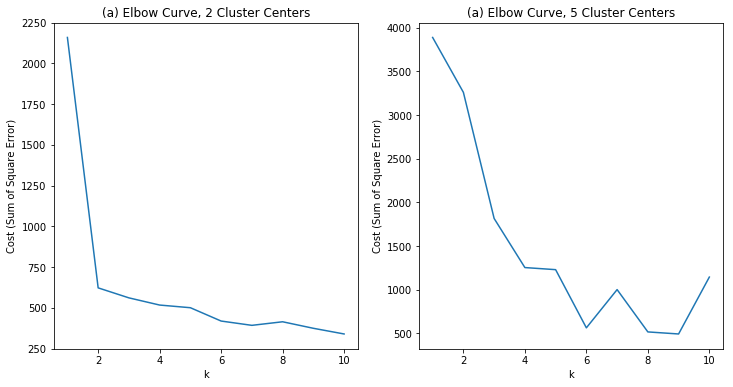

In [21]:
# Used https://mubaris.com/2017/10/01/kmeans-clustering-in-python/ as a reference
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

''' 
def KMean(X, k, iter):
    
    # Select K and randomly select K mean values
    C_X_locs = np.random.randint(low=0, high=len(X),size=k)
    C_X = X[C_X_locs, :]
    
    # Iterate until convergence
    for i in range(iter):
        cost=0
        
        # Assign observations to nearest mean
        y_pred = np.zeros(len(X))

        for i in range(len(X)): 
            L2 = np.linalg.norm(X[i]-C_X, axis=1)
            cost = cost + np.min(L2)
            y_pred[i] = np.argmin(L2)

        # Update mean to be centroid of labeled data
        for i in range(k):
            points = [X[j] for j in range(len(X)) if y_pred[j] == i]
            C_X[i] = np.mean(points, axis=0)
        
    return y_pred, cost


X_2c, y_2c = make_blobs(n_samples=500, centers=2, n_features=2, random_state = 2)
X_5c, y_5c = make_blobs(n_samples=500, centers=5, n_features=2, random_state = 10)
ks = np.arange(1,11)

cost_2c = np.zeros(np.shape(ks))
for i,k in enumerate(ks):
    y_pred, cost = KMean(X_2c, k, 200)
    cost_2c[i] = cost
 
 '''    

X_5c, y_5c = make_blobs(n_samples=500, centers=5, n_features=2, random_state = 10)
cost_5c = np.zeros(np.shape(ks))
for i,k in enumerate(ks):
    y_pred, cost = KMean(X_5c, k, 200)
    cost_5c[i] = cost

    
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.xlabel('k')
plt.ylabel('Cost (Sum of Square Error)')
plt.title('(a) Elbow Curve, 2 Cluster Centers')
plt.plot(ks, cost_2c)
    
plt.subplot(1,2,2)
plt.xlabel('k')
plt.ylabel('Cost (Sum of Square Error)')
plt.title('(a) Elbow Curve, 5 Cluster Centers')
plt.plot(ks, cost_5c)
plt.show()


**(a)** The elbow in the 2 cluster center curve is at k=2, and the elbow in the 5 cluster center curve is at approximately k=5.  At these values of k, the number of clusters in the data equals the number of means in the algorithm, so the algorithm can correctly classify the clusters individually.

**(b)** 

(1) K-means is a centroid-based clustering method where k mean values are iteratively updated according to the centroids of the data clusters until convergence.  This method varies from other clustering methods because it assumes the data clusters are gaussians with identical covariance matrices, so it struggles with nonlinear boundaries and correlation between features.

(2) Agglomerative clustering is a hierarchical clustering method where distance is used to link the most similar data points together, and a dissimilarity threshold is set to produce the different clusters.  This method varies from other clustering methods because performs well when clusters are well-separated but can be computationally slow and struggles when clusters overlap.

(3) Gaussian mixture model is a distribution-based clustering method where the model assumes that the data is from a mixture of gaussian distributions with unknown parameters.  This method varies from other clustering methods because it can perform well on clusters that have different covariance matrices and correlation between features, but it still struggles with clusters that are not approximately gaussian.

(4) DBSCAN is a density-based clustering method where points that are closely packed together are classified as a cluster and outliers are not classified.  This method varies from other clustering methods because it does not require the number of clusters to be determined by the user and it can find arbitrarily shaped clusters, but it cannot handle clusters of different densities and it struggles with border points.

(5) Spectral clustering is a graph-based clustering method where the dimensionality of the data is reduced using an affinity matrix and clustering is performed in the new space.  This method varies from other clustering methods because it makes few assumptions about the data, but it is computationally expensive and requires the user to specify the number of clusters.


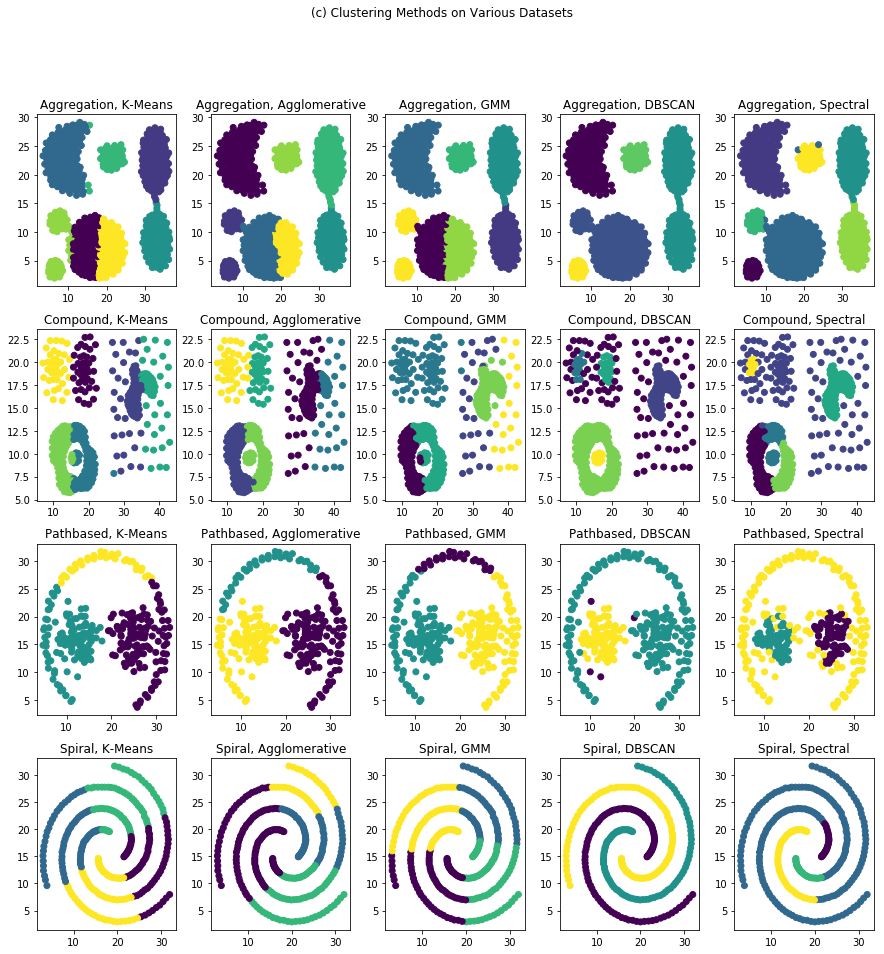

In [131]:
# Data from https://cs.joensuu.fi/sipu/datasets/
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

aggregation=pd.read_csv('cluster_data/Aggregation.csv', header=None)
compound=pd.read_csv('cluster_data/Compound.csv', header=None)
pathbased=pd.read_csv('cluster_data/pathbased.csv', header=None)
spiral=pd.read_csv('cluster_data/spiral.csv', header=None)

data_names=[aggregation, compound, pathbased, spiral]
titles = ['Aggregation', 'Compound', 'Pathbased', 'Spiral']
params = [7, 6, 3, 4]
dbscanparams = [2, 1, 2, 2.5]


i=0
plt.figure(figsize=(15, 15))
plt.suptitle('(c) Clustering Methods on Various Datasets')
for name in data_names:
    kmeans = KMeans(n_clusters=params[i]).fit_predict(name.values[:, 0:2])
    agclust = AgglomerativeClustering(n_clusters=params[i]).fit_predict(name.values[:,0:2])
    gmm = GaussianMixture(n_components=params[i]).fit(name.values[:,0:2])
    gmm = gmm.predict(name.values[:,0:2])
    dbscan = DBSCAN(eps=dbscanparams[i]).fit_predict(name.values[:,0:2])
    spec = SpectralClustering(n_clusters=params[i]).fit_predict(name.values[:,0:2])
    
    plt.subplot(4, 5, (i*5)+1)
    plt.title(('{}, K-Means').format(titles[i]))
    plt.scatter(name[0], name[1], c=kmeans)
    
    plt.subplot(4, 5, (i*5)+2)
    plt.title(('{}, Agglomerative').format(titles[i]))
    plt.scatter(name[0], name[1], c=agclust)
    
    plt.subplot(4, 5, (i*5)+3)
    plt.title(('{}, GMM').format(titles[i]))
    plt.scatter(name[0], name[1], c=gmm)
    
    plt.subplot(4, 5, (i*5)+4)
    plt.title(('{}, DBSCAN').format(titles[i]))
    plt.scatter(name[0], name[1], c=dbscan)
    
    plt.subplot(4, 5, (i*5)+5)
    plt.title(('{}, Spectral').format(titles[i]))
    plt.scatter(name[0], name[1], c=spec)
    i=i+1
    
plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

**(c)** For the aggregation dataset, the spectral clustering method performed the best.  Although the spectral clustering method misclassified some of the edge data points, the flexible algorithm was able to classify the clusters well because it can adapt to different shapes.  The k-means algorithm performed the worst because k-means assumes gaussian distributions with identical covariance matrices, which does not describe the aggregation dataset.

For the compound dataset, the DBSCAN method performed the best.  Although it struggled with the clusters in the top left corner, it was able to extract the clusters by density which was useful for the clusters on the right and bottom left.  The spectral method performed the worst because it really overfit clusters in the bottom left corner, even though it correctly classified the right side.  

For the pathbased dataset, the spectral clustering method performed the best.  Its flexibility was able to detect the differently shaped clusters correctly.  The k-means and gaussian mixture model algorithms performed poorly because they cannot adapt to data that doesn’t follow gaussian distributions.

For the spiral dataset, the DBSCAN method performed the best.  This is because the spiral has arbitrarily shaped but similar density clusters.  The k-means and gaussian mixture model algorithms performed poorly because they cannot adapt to data that doesn’t follow gaussian distributions.


## 2

### [15 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space.  Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - a legend should be provided).

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available.*

**ANSWER**

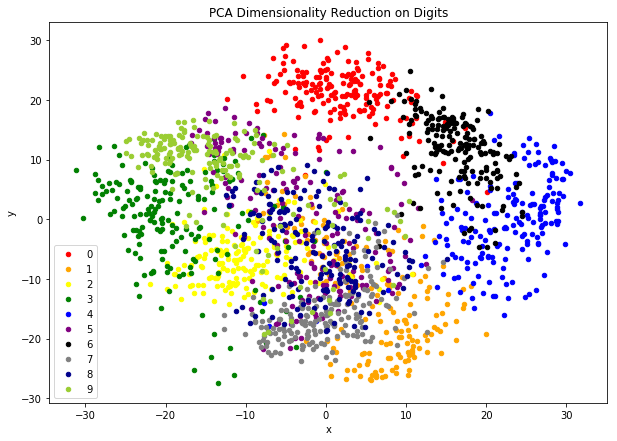

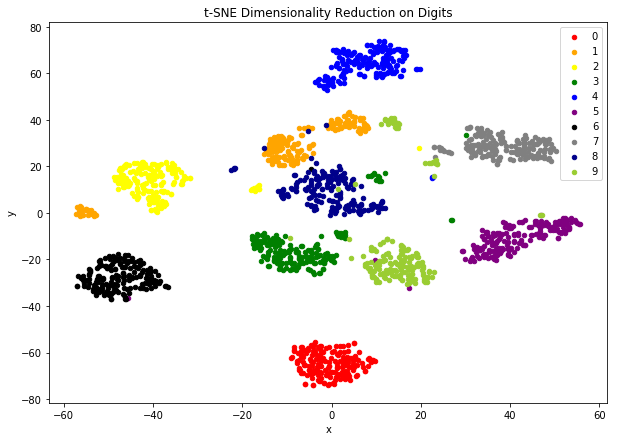

In [163]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# (a) Load dataset and apply PCA
data, target = datasets.load_digits(n_class=10, return_X_y=True)
pca = PCA(n_components=2)
X_new = pca.fit_transform(data, y=target)

df = pd.DataFrame(dict(x=X_new[:,0], y=X_new[:,1], label=target))
colors = {0:'red', 1:'orange', 2:'yellow', 3:'green', 4:'blue', 5:'purple', 6:'black', 7:'grey', 8:'darkblue', 9:'yellowgreen'}
fig, ax = plt.subplots(figsize=(10,7))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
ax.set_title('PCA Dimensionality Reduction on Digits')
plt.show()

# (b) Use t-SNE
tsne = TSNE(n_components=2)
X2_new = tsne.fit_transform(data, y=target)

df2 = pd.DataFrame(dict(x=X2_new[:,0], y=X2_new[:,1], label=target))
colors = {0:'red', 1:'orange', 2:'yellow', 3:'green', 4:'blue', 5:'purple', 6:'black', 7:'grey', 8:'darkblue', 9:'yellowgreen'}
fig, ax = plt.subplots(figsize=(10,7))
grouped = df2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
ax.set_title('t-SNE Dimensionality Reduction on Digits')
plt.show()

**c)** As seen from the grapsh of part **a)** and **b)** above, the t-SNE dimensionality reduction technique outperforms the PCA dimensionality reduction technique.  In the t-SNE dimensionality reduction technique, the classes are in clearly distinguishable clusters.  In the PCA dimensionality reduction technique, the clusters of the different classes overlap making them not as distinguishable. t-SNE performs well on this dataset because it performs well on high-dimensionality data and prioritizes keeping like neighbors grouped together.

## 3

### [25 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incoporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Choose a few values of $k$ that clearly show the difference in image reconstruction. Plot the original image, and 3 compressed versions with different levels of compression (i.e. using different numbers of principal components).

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

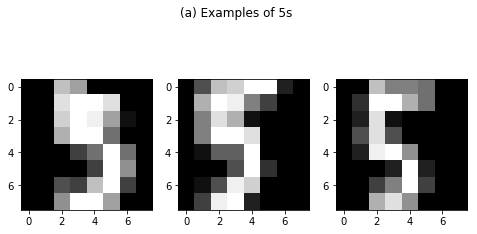

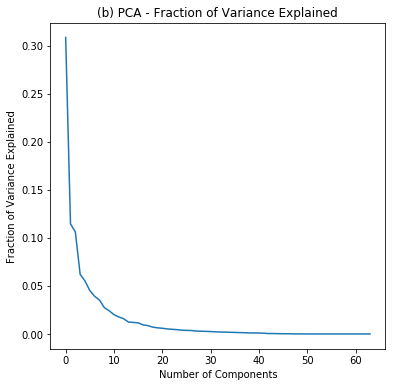

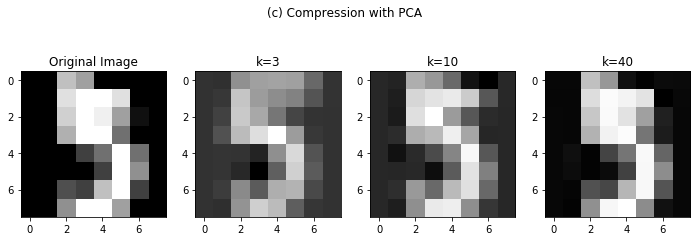

In [235]:
from sklearn import datasets
from sklearn.decomposition import PCA

# (a) Plot 5s
data, target = datasets.load_digits(n_class=10, return_X_y=True)
i=0
j=0
plt.figure(figsize=(8,4))
plt.suptitle('(a) Examples of 5s')
while (i<3):
    if (target[j] == 5):
        plt.subplot(1,3,i+1)
        plt.imshow(digits.images[j])
        i=i+1
    j=j+1
plt.show()

# Make new dataset
data = data[np.where(target == 5), :]
data = np.squeeze(data, axis=0)
target = target[np.where(target==5)]

# (b) Perform PCA
pca = PCA()
pca.fit(data, y=target)

plt.figure(figsize=(6,6))
plt.plot(pca.explained_variance_ratio_)
plt.title('(b) PCA - Fraction of Variance Explained')
plt.ylabel('Fraction of Variance Explained')
plt.xlabel('Number of Components')
plt.show()


# (c) Compression with k=3,10,40
X_new = pca.transform(data[0].reshape(-1, 1).T)
X_k3  = np.copy(X_new)
X_k10 = np.copy(X_new)
X_k40 = np.copy(X_new)
X_k3[:, 3:]=0
X_k10[:, 10:]=0
X_k40[:, 40:]=0

data_k3 = pca.inverse_transform(X_k3)
data_k10 = pca.inverse_transform(X_k10)
data_k40 = pca.inverse_transform(X_k40)

plt.figure(figsize=(12,4))
plt.suptitle('(c) Compression with PCA')

plt.subplot(1,4,1)
plt.imshow(data[0].reshape(8,8))
plt.title('Original Image')

plt.subplot(1,4,2)
plt.imshow(data_k3[0].reshape(8,8))
plt.title('k=3')

plt.subplot(1,4,3)
plt.imshow(data_k10[0].reshape(8,8))
plt.title('k=10')

plt.subplot(1,4,4)
plt.imshow(data_k40[0].reshape(8,8))
plt.title('k=40')

plt.show()

**(d)** As seen in part **(c)** above, at least 10 principal components are needed to well-approximate the data.  When k=3, the compression rate is 0.047, but the image of the 5 is not clearly recognizable.  When k=10, the compression rate is 0.156, and the image of the 5 is clearly recognizable.  When k=40, the compression rate is 0.625 and the image of the 5 is clearly recognizable.  However, using these extra principal components gives little improvement on using 10 principal components.  

## 4

### [15 points] Build and test your own Neural Network

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Your network should have two input nodes, two hidden layers with five nodes each and one output node. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC.

**(c)** Suggest at least two ways in which you neural network could be improved.

**(d)** [5 extra credit bonus points] Adjust the parameters in your model in (b) and choose your parameters to improve performance.

**ANSWER**

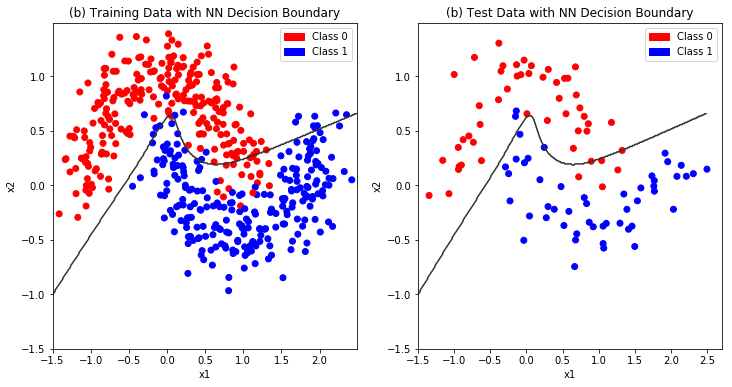

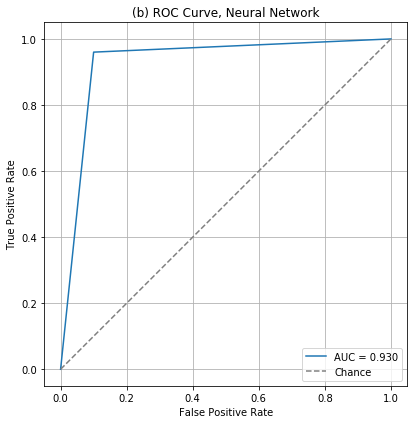

In [4]:
import numpy as np
from sklearn.datasets import make_moons
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
# Used https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/ as guide

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

def calc_err(y, yhat):
        return (0.5*((yhat-y)**2))

# Initialize a network
def initialize_network(n_inputs, n_hidden1, n_hidden2, n_outputs):
    # Make weights and biases for all nodes
    
    network = list()
    hidden_layer1 = {'weights':np.random.uniform(size=(n_inputs+1,n_hidden1))}
    network.append(hidden_layer1)
    hidden_layer2 = {'weights':np.random.uniform(size=(n_hidden1+1,n_hidden2))}
    network.append(hidden_layer2)
    output_layer = {'weights':np.random.uniform(size=(n_hidden2+1,n_outputs))}
    network.append(output_layer)
    return network

def activate(weights, inputs):
    w= weights[:-1, :]
    a = np.dot(w.T,inputs)
    a = a + weights[-1,:]
    return a

# Forward propagate input to a network output
def forward_propagate(network, xi):
    inputs = xi
    for layer in network:
        a = activate(layer['weights'], inputs)
        layer['z'] = sigmoid(a)
        layer['a'] = a
        inputs = layer['z']
    return inputs
        
def back_prop(network, xi, yi, epsilon):
    yhat = forward_propagate(network, xi)
    #print(calc_err(yhat, yi))
    
    delta3 = (yhat-yi)*d_sigmoid(network[2]['a'])
    delta2 = np.sum(delta3*network[2]['weights']*d_sigmoid(network[1]['a']), axis=0)
    delta1 = np.sum(delta2*network[1]['weights']*d_sigmoid(network[0]['a']), axis=0)
   
    dE_dw3 = np.outer(network[1]['z'],delta3)
    dE_dw2 = np.outer(network[0]['z'],delta2)
    dE_dw1 = np.outer(xi, delta1)
    
    dE_dw1 = np.append(dE_dw1, np.zeros((1,5)), axis=0)
    dE_dw2 = np.append(dE_dw2, np.zeros((1,5)), axis=0)
    dE_dw3 = np.append(dE_dw3, np.zeros((1,1)), axis=0)
    
    network[0]['weights'] -= epsilon*dE_dw1
    network[1]['weights'] -= epsilon*dE_dw2
    network[2]['weights'] -= epsilon*dE_dw3
    
# (a) Create Neural Network Class
class NN:
    
    def __init__(self):
        self.network = None
        return None
    
    def fit(self, Xtrain, ytrain, epsilon):
        network = initialize_network(2,5,5,1)
        
        for i in range(0,50):
            for j in range(len(Xtrain)):
                back_prop(network, Xtrain[j], ytrain[j], epsilon)
            #print(network[0]['weights'])
         
        self.network = network;
            
    def predict_proba(self, X):
        yhat = np.zeros(len(X))
        
        for i in range(len(X)):
            yhat[i] = forward_propagate(self.network, X[i])
            
        return yhat
    
    def predict(self, X):
        return np.round(self.predict_proba(X))
        

# (b) Training and Test Data
Xtrain, ytrain = make_moons(500, noise=0.2)
Xtest, ytest = make_moons(100, noise=0.2)
mynn = NN()
mynn.fit(Xtrain, ytrain, 1)


xx, yy = np.mgrid[-1.5:2.5:.01, -1.5:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = mynn.predict(grid)
probs = np.reshape(probs, np.shape(xx))

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
colors=['red', 'blue']
plt.scatter(Xtrain[:,0], Xtrain[:,1] , c=ytrain, cmap=matplotlib.colors.ListedColormap(colors))
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=0.6)
plt.xlabel('x1')
plt.ylabel('x2')
red_patch = mpatches.Patch(color=colors[0], label='Class 0')
blue_patch = mpatches.Patch(color=colors[1], label='Class 1')
plt.legend(handles=[red_patch, blue_patch])
plt.title('(b) Training Data with NN Decision Boundary')


plt.subplot(1, 2, 2)
colors=['red', 'blue']
plt.scatter(Xtest[:,0], Xtest[:,1] , c=ytest, cmap=matplotlib.colors.ListedColormap(colors))
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=0.6)
plt.xlabel('x1')
plt.ylabel('x2')
red_patch = mpatches.Patch(color=colors[0], label='Class 0')
blue_patch = mpatches.Patch(color=colors[1], label='Class 1')
plt.legend(handles=[red_patch, blue_patch])
plt.title('(b) Test Data with NN Decision Boundary')
plt.show()

# Make ROC Curve
def plot_roc(labels, prediction_scores):
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
    plt.plot(fpr, tpr, label=legend_string)
    
yhat = mynn.predict(Xtest)
plt.figure(figsize=(6,6))
plot_roc(ytest, yhat)
plt.title('(b) ROC Curve, Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.tight_layout()
plt.plot([0, 1], [0, 1], '--', color='gray', label='Chance')
plt.legend()
plt.show()

**(c)** One way to improve neural network performance would be to use the rectified linear unit (ReLU) activation function instead of the sigmoid activation function.  The ReLU activation function is known to converge fast and does not have the same vanishing gradient problem as the sigmoid function, so it might improve performance.  Another way to improve neural network performance would be to use more training data.  Fitting the model to more training data would prevent the model from overfitting to the training data, and it would allow the model to generalize better.

**(d)** Did not do extra credit.